#  MNIST dataset

The MNIST database (Modified National Institute of Standards and Technology database) is a large database collection of handwritten digits used for training various different image processing systems. This database (Or dataset as some like to call it) is mostly used in the field of machine learning in respect to image processing machine learning. The set contains various digits re-written in different styles to help with the various different ways the digit can be written. The MNIST database contains 60,000 training images and 10,000 testing images. Half of the training set and half of the test set were taken from NIST's training dataset, while the other half of the training set and the other half of the test set were taken from NIST's testing dataset.

## Notebook Purpose

The main purpose of this MNIST notebook is to read the data in from the files and unzip them as well as being able to create an use a function that can store all images on the system. 

## Unzipping 

The first step is to be able to read from the training files that were provided for us at http://yann.lecun.com/exdb/mnist/.
The files on the site are compressed using gzip but luckily for us python can handle files like that with a simple import. 

In [17]:
import gzip # Imports gzip for opening and reading gzipped files
import numpy as np # Import for numpy 
with gzip.open('MNISTData/t10k-images-idx3-ubyte.gz', 'rb') as file: # gzip opens the zipped file located in the folder
    file_content1 = file.read()
    
with gzip.open('MNISTData/train-images-idx3-ubyte.gz', 'rb') as file: # Same as before 
    file_content2 = file.read()
    

with gzip.open('MNISTData/t10k-labels-idx1-ubyte.gz', 'rb') as file: # Gzip opens the labels file
    label_content1 = file.read()
    
with gzip.open('MNISTData/train-labels-idx1-ubyte.gz', 'rb') as file:
    label_content2 = file.read()

Please note: For the gzip file path provided I created a folder in jupyter called "MNISTData" and then added the .gz file into it, this will need to be done on your own machine if you want the code to work.

By importing gzip we are then able to open and read the .gz file provided. To test we have this working and running properly we can check the files contents. 

In [18]:
type(file_content1) # prints the contents of the first file, output shows the contents are in bytes

bytes

Using this line of code we can see the files contents are in bytes. We will now print the first 4 bytes of the file (Referred to as the magic numbers on the documentation) 

In [20]:
file_content1[0:4] # prints the first 4 bytes of the file

b'\x00\x00\x08\x03'

# Image Display

The next step for us is to actually show and display an image from the dataset just to be sure were still on the right path. To this you can just simply import mathplot and use the "image show" command to display it.

Before doing that we must first insure that the image is coming from the IDX files in the .gz folder. To do so we can use the numpy package to reshape the variable into (28*28) grids so that we can plot them on a canvas and visualize the image.

In [22]:
import numpy as np
image = ~np.array(list(file_content[16:800])).reshape(28,28).astype(np.uint8) # takes the first image of the file 
# 16 is the first bit of the first image, 800 is the last bit of the first image

In [24]:
%matplotlib inline
import matplotlib.pyplot as plot ## import ploting for image display

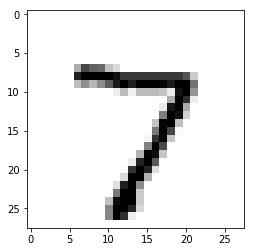

In [25]:
plot.imshow(image, cmap='gray') # plots the image and shows it

Using mathplot we are able to visualize the first image of the dataset and display it. Now onto the more tricky part, trying to save all 60'000 images contained in the data set!

# CV2

CV2 is the name of the import package we will be using to attempt to save the images from the training files. We can use functions such as .imread() to read images and .imwrite to help save the images in general. The first step is to install opencv off the main website and then add the cv2 environment variable to the python path. I encountered a large number of errors while trying to install opencv and get the import working. After many, MANY attempts at fixes and the likes, I discovered that installing opencv via anaconda with "conda install opencv" is by far the best way. OpenCV can have many confliction errors with your version number of python, however, installing it via Anaconda prompt seems to give the correct and working download. CV2 will allow us to save plots as .png images.

In [11]:
import gzip 
import cv2

with gzip.open('MNISTData/t10k-images-idx3-ubyte.gz', 'rb') as file:
    file_content = file.read()
    
file_content[0:4]

b'\x00\x00\x08\x03'

With cv2 successfully imported we can then open the gzip folder and output the first 4 bytes of the file (referred to as the magic number) 16 is the first bit of the first image. To save the files more easier we could use a for loop that loops through each image in the folder saving each one as it goes by but were going to need a bit more than the first bit of the first image to do that. 

We will also need to know the total number of images contained in the folder which is 60000. The starting bytes as stated above is 16. The image is 28x28 pixels which adds to 784 total pixels.

In [16]:


# Variables used for data manipulation. 
trainImages1=16 # first bit of first image 
trainImages2=800 # Last bit of first image 

trainLabels1=8 # First bit of first label 
trainLabels2=9 # Last bit of first label 


with gzip.open('MNISTData/t10k-images-idx3-ubyte.gz', 'rb') as file: # use gzip to open the images file
    imagecontents = file.read()
    

with gzip.open('MNISTData/t10k-labels-idx1-ubyte.gz', 'rb') as file: # use gzip to open the labels file 
    labelscontents = file.read()


for x in range(10): # for loop that goes through each image, given the value 10 it should save the first 10 images in the dataset 
    image = ~np.array(list(imagecontents[trainImages1:trainImages2])).reshape(28,28).astype(np.uint8)
    labels = np.array(list(labelscontents[trainLabels1:trainLabels2])).astype(np.uint8)
        
    # each label is byte to the next one so we increment the value by 1 each time
    trainLabels1+=1
    trainLabels2+=1
        
    # same as before, but for images, since each next image is 784 bytes we increment the values by 784    
    trainImages1+=784
    trainImages2+=784
        
        
    cv2.imwrite('set ' + str(x) + 'digit ' + str(labels) + '.png', image) # cv2 writes and saves the images to folder
        
        

# Does The Loop Work? 

The loop saves images to the default directory successfully. The parameter for the range can be edited to select how many images you want to save (example: having 10 will save the first 10, having 100 will save the first 100 and so on.) 